In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import dask.dataframe as dd

In [2]:
from pathlib import Path

AVES_ROOT = Path("/home/anouk/aves")
DATA_PATH = Path("/home/anouk/aves/data/external/censo_2017/")
file = "Hogares"

In [3]:
censo_hogares = pd.read_csv(DATA_PATH / "Hogares.csv", sep=";")

In [11]:
censo_hogares.columns

Index(['REGION', 'PROVINCIA', 'COMUNA', 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',
       'NVIV', 'NHOGAR', 'TIPO_HOGAR', 'TIPO_OPERATIVO'],
      dtype='object')

In [16]:
censo_hogares_nuble = nuble_shape.merge(censo_hogares[censo_hogares.PROVINCIA==84][['DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',
       'NVIV', 'NHOGAR', 'TIPO_HOGAR', 'TIPO_OPERATIVO']], left_on='LOC_ZON', right_on="ZC_LOC")

In [17]:
grouped=censo_hogares_nuble.groupby('ZC_LOC')

In [7]:
traduccion = pd.read_csv(DATA_PATH/"Tablas_parametros/microdato_censo2017-geografia.csv", sep=";")
df = traduccion[traduccion.REGION==16]
df.to_csv(DATA_PATH/"Tablas_parametros/traduccion_nuble.csv", index=False)

In [18]:
censo_hogares.to_parquet(DATA_PATH/"Hogares.parquet", index=False)

In [14]:
#censo_hogares[censo_hogares.PROVINCIA==84]['COMUNA']=census.decode_column(censo_hogares, fname=DATA_PATH/"Tablas_parametros/traduccion_nuble.csv", index_col="ID_ZONA_LOC", col_name="COMUNA", sep=',')
cols_to_replace = ["COMUNA", "REGION", "PROVINCIA"]
for col in cols_to_replace:
    censo_hogares[col] = censo_hogares['ID_ZONA_LOC'].map(traduccion.set_index('ID_ZONA_LOC')[col])

In [23]:
censo_hogares['NOM_COMUNA']=census.decode_column(censo_hogares, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="COMUNA", sep=';')


In [25]:
censo_hogares[censo_hogares.REGION ==16]

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,TIPO_HOGAR,TIPO_OPERATIVO,NOM_COMUNA
3123645,16,161,16109,1,1,1,2752,1,1,Hogar extenso,Hogar en vivienda particular,YUNGAY
3123646,16,161,16109,1,1,1,2752,2,1,Hogar unipersonal,Hogar en vivienda particular,YUNGAY
3123647,16,161,16109,1,1,1,2752,3,1,Hogar nuclear biparental con hijos,Hogar en vivienda particular,YUNGAY
3123648,16,161,16109,1,1,1,2752,4,1,Hogar extenso,Hogar en vivienda particular,YUNGAY
3123649,16,161,16109,1,1,1,2752,5,1,Hogar extenso,Hogar en vivienda particular,YUNGAY
...,...,...,...,...,...,...,...,...,...,...,...,...
3287656,16,161,16101,99,1,999,4633,59,1,Hogar sin núcleo,Hogar en vivienda particular,CHILLÁN
3287657,16,161,16101,99,1,999,4633,60,1,No aplica,Operativo personas en tránsito (no es hogar),CHILLÁN
3287658,16,161,16101,99,1,999,4633,61,1,Hogar unipersonal,Hogar en vivienda particular,CHILLÁN
3287659,16,161,16101,99,1,999,4633,62,1,Hogar compuesto,Hogar en vivienda particular,CHILLÁN


In [26]:
df_p = pd.read_parquet(DATA_PATH/"Hogares.parquet", columns=["COMUNA", "TIPO_OPERATIVO"])
df_p

,COMUNA,TIPO_OPERATIVO
0,15202,Hogar en vivienda particular
1,15202,Hogar en vivienda particular
2,15202,Hogar en vivienda particular
3,15202,Hogar en vivienda particular
4,15202,Hogar en vivienda particular
...,...,...
5664673,1101,Hogar en vivienda particular
5664674,1101,Hogar en vivienda particular
5664675,1101,Hogar en vivienda particular
5664676,1101,Hogar en vivienda particular


In [7]:
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    'P07': [
        'Jefe/a de hogar',
        'Esposo/a o cónyuge',
        'Conviviente por unión civil',
        'Conviviente de hecho o pareja',
        'Hijo/a',
        'Hijo/a del cónyuge, conviviente o pareja',
        'Hermano/a',
        'Padre/madre',
        'Cuñado/a',
        'Suegro/a',
        'Yerno/nuera',
        'Nieto/a',
        'Abuelo/a',
        'Otro pariente',
        'No pariente',
        'Servicio doméstico puertas adentro',
        'Persona en vivienda colectiva',
        'Persona en tránsito',
        'Persona en operativo calle'
    ]
}

# Create a Pandas dataframe
df = pd.DataFrame(data)

# Specify the path to save the CSV file
name = "P07"
csv_path = f"{DATA_PATH}/Tablas_parametros/{name}.csv"

# Save the dataframe to a CSV file
df.to_csv(csv_path, index=False)

In [8]:
data_p08 = {
    'id': [1, 2],
    'P08': ['Hombre', 'Mujer']
}

# Create a Pandas dataframe for P08
df_p08 = pd.DataFrame(data_p08)

# Specify the path to save the CSV file for P08
name_p08 = "P08"
csv_path_p08 = f"{DATA_PATH}/Tablas_parametros/{name_p08}.csv"

# Save the dataframe to a CSV file for P08
df_p08.to_csv(csv_path_p08, index=False)


In [9]:
data_p10 = {
    'id': [1, 98, 99, 2, 3, 4],
    'P10': [
        'En esta vivienda',
        'No Aplica',
        'Missing',
        'En otra vivienda',
        'En otra comuna',
        'En otro país'
    ]
}

# Create a Pandas dataframe for P10
df_p10 = pd.DataFrame(data_p10)

# Specify the path to save the CSV file for P10
name_p10 = "P10"
csv_path_p10 = f"{DATA_PATH}/Tablas_parametros/{name_p10}.csv"

# Save the dataframe to a CSV file for P10
df_p10.to_csv(csv_path_p10, index=False)


In [3]:
data_pais = {
    'id': [
        2, 998, 999, 5, 9, 10, 12, 13, 21, 29, 32, 36, 40, 51, 56, 68, 76, 96,
        100, 124, 136, 142, 150, 156, 158, 170, 188, 191, 192, 203, 208, 214,
        218, 222, 246, 250, 258, 275, 276, 300, 320, 332, 340, 348, 356, 360,
        364, 372, 376, 380, 392, 400, 410, 422, 484, 504, 524, 528, 548, 554,
        558, 578, 586, 591, 600, 604, 608, 616, 620, 626, 630, 642, 643, 688,
        710, 724, 752, 756, 760, 764, 792, 804, 818, 826, 840, 858, 862, 997
    ],
    'PAIS': [
        'África', 'No aplica', 'Missing', 'Sudamérica', 'Oceanía', 'Antártida',
        'Argelia', 'Centroamérica', 'Norteamérica', 'Caribe', 'Argentina',
        'Australia', 'Austria', 'Armenia', 'Bélgica', 'Bolivia (Estado Plurinacional de)',
        'Brasil', 'Brunei Darussalam', 'Bulgaria', 'Canadá', 'Islas Caimán',
        'Asia', 'Europa', 'China', 'Taiwán (provincia de China)', 'Colombia',
        'Costa Rica', 'Croacia', 'Cuba', 'República Checa', 'Dinamarca',
        'República Dominicana', 'Ecuador', 'El Salvador', 'Finlandia', 'Francia',
        'Polinesia Francesa', 'Palestina (Estado de)', 'Alemania', 'Grecia',
        'Guatemala', 'Haití', 'Honduras', 'Hungría', 'India', 'Indonesia',
        'Irán (República Islámica de)', 'Irlanda', 'Israel', 'Italia', 'Japón',
        'Jordania', 'Corea del Sur (República de)', 'Líbano', 'México', 'Marruecos',
        'Nepal', 'Países Bajos', 'Vanuatu', 'Nueva Zelandia', 'Nicaragua', 'Noruega',
        'Pakistán', 'Panamá', 'Paraguay', 'Perú', 'Filipinas', 'Polonia', 'Portugal',
        'Timor-Leste', 'Puerto Rico', 'Rumania', 'Rusia (Federación de)', 'Serbia',
        'Sudáfrica', 'España', 'Suecia', 'Suiza', 'República Árabe Siria', 'Tailandia',
        'Turquía', 'Ucrania', 'Egipto', 'Reino Unido de Gran Bretaña e Irlanda del Norte',
        'Estados Unidos de América', 'Uruguay', 'Venezuela (República Bolivariana de)',
        'País no declarado'
    ]
}

# Create a Pandas dataframe for PAIS
df_pais = pd.DataFrame(data_pais)

# Specify the path to save the CSV file for PAIS
name_pais = "PAIS"
csv_path_pais = f"{DATA_PATH}/Tablas_parametros/{name_pais}.csv"

# Save the dataframe to a CSV file for PAIS
df_pais.to_csv(csv_path_pais, index=False)

In [4]:
data_p11 = {
    'id': [1, 2, 3, 98, 99, 4, 5, 6, 7, 8, 9],
    'P11': [
        'Aún no nacía', 'En esta comuna', 'En otra comuna', 'No aplica', 'Missing',
        'Perú', 'Argentina', 'Bolivia', 'Ecuador', 'Colombia', 'Otro'
    ]
}

# Create a Pandas dataframe for P11
df_p11 = pd.DataFrame(data_p11)

# Specify the path to save the CSV file for P11
name_p11 = "P11"
csv_path_p11 = f"{DATA_PATH}/Tablas_parametros/{name_p11}.csv"

# Save the dataframe to a CSV file for P11
df_p11.to_csv(csv_path_p11, index=False)

In [5]:
data_p12 = {
    'id': [1, 98, 99, 2, 3, 4, 5, 6, 7, 8],
    'P12': [
        'En esta comuna', 'No aplica', 'Missing', 'En otra comuna', 'Perú',
        'Argentina', 'Bolivia', 'Ecuador', 'Colombia', 'Otro'
    ]
}

# Create a Pandas dataframe for P12
df_p12 = pd.DataFrame(data_p12)

# Specify the path to save the CSV file for P12
name_p12 = "P12"
csv_path_p12 = f"{DATA_PATH}/Tablas_parametros/{name_p12}.csv"

# Save the dataframe to a CSV file for P12
df_p12.to_csv(csv_path_p12, index=False)

In [6]:
data_p12a_tramo = {
    'id': [1, 98, 99, 2, 3, 4],
    'P12A_TRAMO': [
        'Entre 2010 y 2017', 'No aplica', 'Missing', 'Entre 2000 y 2009',
        'Entre 1990 y 1999', 'Antes de 1990'
    ]
}

# Create a Pandas dataframe for P12A_TRAMO
df_p12a_tramo = pd.DataFrame(data_p12a_tramo)

# Specify the path to save the CSV file for P12A_TRAMO
name_p12a_tramo = "P12A_TRAMO"
csv_path_p12a_tramo = f"{DATA_PATH}/Tablas_parametros/{name_p12a_tramo}.csv"

# Save the dataframe to a CSV file for P12A_TRAMO
df_p12a_tramo.to_csv(csv_path_p12a_tramo, index=False)


In [7]:
data_p12a_tramo = {
    'id': [1, 98, 99, 2, 3, 4],
    'P12A_TRAMO': [
        'Entre 2010 y 2017', 'No aplica', 'Missing', 'Entre 2000 y 2009',
        'Entre 1990 y 1999', 'Antes de 1990'
    ]
}

# Create a Pandas dataframe for P12A_TRAMO
df_p12a_tramo = pd.DataFrame(data_p12a_tramo)

# Specify the path to save the CSV file for P12A_TRAMO
name_p12a_tramo = "P12A_TRAMO"
csv_path_p12a_tramo = f"{DATA_PATH}/Tablas_parametros/{name_p12a_tramo}.csv"

# Save the dataframe to a CSV file for P12A_TRAMO
df_p12a_tramo.to_csv(csv_path_p12a_tramo, index=False)


In [8]:
data_p13 = {
    'id': [1, 98, 99, 2, 3],
    'P13': [
        'Sí', 'No aplica', 'Missing', 'No asiste actualmente', 'Nunca asistió'
    ]
}

# Create a Pandas dataframe for P13
df_p13 = pd.DataFrame(data_p13)

# Specify the path to save the CSV file for P13
name_p13 = "P13"
csv_path_p13 = f"{DATA_PATH}/Tablas_parametros/{name_p13}.csv"

# Save the dataframe to a CSV file for P13
df_p13.to_csv(csv_path_p13, index=False)

In [9]:
data_p14 = {
    'id': [0, 98, 99, 1, 2, 3, 4, 5, 6, 7, 8],
    'P14': [
        '0', 'No aplica', 'Missing', '1°', '2°', '3°', '4°', '5°', '6°', '7°', '8°'
    ]
}

# Create a Pandas dataframe for P14
df_p14 = pd.DataFrame(data_p14)

# Specify the path to save the CSV file for P14
name_p14 = "P14"
csv_path_p14 = f"{DATA_PATH}/Tablas_parametros/{name_p14}.csv"

# Save the dataframe to a CSV file for P14
df_p14.to_csv(csv_path_p14, index=False)

In [10]:
data_p15 = {
    'id': [1, 98, 99, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'P15': [
        'Sala cuna o jardín infantil', 'No aplica', 'Missing', 'Prekínder', 'Kínder',
        'Especial o diferencial', 'Educación básica', 'Primaria o preparatorio (sistema antiguo)',
        'Científico-humanista', 'Técnica profesional', 'Humanidades (sistema antiguo)',
        'Técnica comercial, industrial/normalista (sistema antiguo)',
        'Técnico superior (1-3 años)', 'Profesional (4 o más años)', 'Magíster', 'Doctorado'
    ]
}

# Create a Pandas dataframe for P15
df_p15 = pd.DataFrame(data_p15)

# Specify the path to save the CSV file for P15
name_p15 = "P15"
csv_path_p15 = f"{DATA_PATH}/Tablas_parametros/{name_p15}.csv"

# Save the dataframe to a CSV file for P15
df_p15.to_csv(csv_path_p15, index=False)

In [11]:
data_p15a = {
    'id': [1, 98, 99, 2],
    'P15A': [
        'Sí', 'No aplica', 'Missing', 'No'
    ]
}

# Create a Pandas dataframe for P15A
df_p15a = pd.DataFrame(data_p15a)

# Specify the path to save the CSV file for P15A
name_p15a = "P15A"
csv_path_p15a = f"{DATA_PATH}/Tablas_parametros/{name_p15a}.csv"

# Save the dataframe to a CSV file for P15A
df_p15a.to_csv(csv_path_p15a, index=False)


In [12]:
data_p16 = {
    'id': [1, 98, 99, 2],
    'P16': [
        'Sí', 'No aplica', 'Missing', 'No'
    ]
}

# Create a Pandas dataframe for P16
df_p16 = pd.DataFrame(data_p16)

# Specify the path to save the CSV file for P16
name_p16 = "P16"
csv_path_p16 = f"{DATA_PATH}/Tablas_parametros/{name_p16}.csv"

# Save the dataframe to a CSV file for P16
df_p16.to_csv(csv_path_p16, index=False)

In [13]:
data_p16a = {
    'id': [1, 98, 99, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'P16A': [
        'Mapuche', 'No aplica', 'Missing', 'Aymara', 'Rapa Nui', 'Lican Antai',
        'Quechua', 'Colla', 'Diaguita', 'Kawésqar', 'Yagán o Yamana', 'Otro'
    ]
}

# Create a Pandas dataframe for P16A
df_p16a = pd.DataFrame(data_p16a)

# Specify the path to save the CSV file for P16A
name_p16a = "P16A"
csv_path_p16a = f"{DATA_PATH}/Tablas_parametros/{name_p16a}.csv"

# Save the dataframe to a CSV file for P16A
df_p16a.to_csv(csv_path_p16a, index=False)

In [14]:
data_p16a_otro = {
    'id': [3, 98, 99, 4, 5, 6, 21, 22, 23, 28, 33, 34, 35, 37, 97],
    'P16A_OTRO': [
        'Lafquenche', 'No aplica', 'Missing', 'Pehuenche', 'Huilliche', 'Picunche',
        'Changos', 'Chonos', 'Ona', 'Tehuelches', 'Pueblos de América Latina',
        'Pueblos del resto del mundo', 'Afrodescendiente',
        'Otros pueblos presentes en el territorio nacional', 'Pueblo no declarado'
    ]
}

# Create a Pandas dataframe for P16A_OTRO
df_p16a_otro = pd.DataFrame(data_p16a_otro)

# Specify the path to save the CSV file for P16A_OTRO
name_p16a_otro = "P16A_OTRO"
csv_path_p16a_otro = f"{DATA_PATH}/Tablas_parametros/{name_p16a_otro}.csv"

# Save the dataframe to a CSV file for P16A_OTRO
df_p16a_otro.to_csv(csv_path_p16a_otro, index=False)

In [15]:
data_p17 = {
    'id': [1, 98, 99, 2, 3, 4, 5, 6, 7, 8],
    'P17': [
        'Por un pago en dinero o especies', 'No aplica', 'Missing',
        'Sin pago para un familiar', 'Tenía empleo pero estuvo de vacaciones, con licencia, en descanso laboral, etc.',
        'Se encontraba buscando empleo', 'Estaba estudiando', 'Realizó quehaceres de su hogar',
        'Es jubilado, pensionado o rentista', 'Otra situación'
    ]
}

# Create a Pandas dataframe for P17
df_p17 = pd.DataFrame(data_p17)

# Specify the path to save the CSV file for P17
name_p17 = "P17"
csv_path_p17 = f"{DATA_PATH}/Tablas_parametros/{name_p17}.csv"

# Save the dataframe to a CSV file for P17
df_p17.to_csv(csv_path_p17, index=False)

In [16]:
data_p18 = {
    'id': ['A', 98, 99, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'Z'],
    'P18': [
        'Agricultura, ganadería, silvicultura y pesca', 'No aplica', 'Missing',
        'Explotación de minas y canteras', 'Industrias manufactureras',
        'Suministro de electricidad, gas, vapor y aire acondicionado',
        'Suministro de agua; evacuación de aguas residuales, gestión de desechos y descontaminación',
        'Construcción', 'Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas',
        'Transporte y almacenamiento', 'Actividades de alojamiento y de servicios de comidas',
        'Información y comunicaciones', 'Actividades financieras y de seguros',
        'Actividades inmobiliarias', 'Actividades profesionales, científicas y técnicas',
        'Actividades de servicios administrativos y de apoyo',
        'Administración pública y defensa; planes de seguridad social de afiliación obligatoria',
        'Enseñanza', 'Actividades de atención de la salud humana y de asistencia social',
        'Actividades artísticas, de entretenimiento y recreativas',
        'Otras actividades de servicios',
        'Actividades de los hogares como empleadores; actividades no diferenciadas de los hogares como productores de bienes y servicios para uso propio',
        'Actividades de organizaciones y órganos extraterritoriales',
        'Rama no declarada'
    ]
}

# Create a Pandas dataframe for P18
df_p18 = pd.DataFrame(data_p18)

# Specify the path to save the CSV file for P18
name_p18 = "P18"
csv_path_p18 = f"{DATA_PATH}/Tablas_parametros/{name_p18}.csv"

# Save the dataframe to a CSV file for P18
df_p18.to_csv(csv_path_p18, index=False)

In [17]:
data_p21m = {
    'id': [1, 98, 99, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'P21M': [
        'Enero', 'No aplica', 'Missing', 'Febrero', 'Marzo', 'Abril', 'Mayo',
        'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
    ]
}

# Create a Pandas dataframe for P21M
df_p21m = pd.DataFrame(data_p21m)

# Specify the path to save the CSV file for P21M
name_p21m = "P21M"
csv_path_p21m = f"{DATA_PATH}/Tablas_parametros/{name_p21m}.csv"

# Save the dataframe to a CSV file for P21M
df_p21m.to_csv(csv_path_p21m, index=False)

In [18]:
data_pais_grupo = {
    'id': [2, 998, 999, 5, 9, 10, 13, 21, 29, 32, 68, 142, 150, 170, 218, 332, 604, 862, 997],
    'PAIS_GRUPO': [
        'África', 'No aplica', 'Missing', 'Sudamérica', 'Oceanía', 'Antártida',
        'Centroamérica', 'Norteamérica', 'Caribe', 'Argentina', 'Bolivia (Estado Plurinacional de)',
        'Asia', 'Europa', 'Colombia', 'Ecuador', 'Haití', 'Perú', 'Venezuela (República Bolivariana de)',
        'País no declarado'
    ]
}

# Create a Pandas dataframe for PAIS_GRUPO
df_pais_grupo = pd.DataFrame(data_pais_grupo)

# Specify the path to save the CSV file for PAIS_GRUPO
name_pais_grupo = "PAIS_GRUPO"
csv_path_pais_grupo = f"{DATA_PATH}/Tablas_parametros/{name_pais_grupo}.csv"

# Save the dataframe to a CSV file for PAIS_GRUPO
df_pais_grupo.to_csv(csv_path_pais_grupo, index=False)


In [19]:
data_p16a_grupo = {
    'id': [1, 98, 99, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'P16A_GRUPO': [
        'Mapuche', 'No aplica', 'Missing', 'Aymara', 'Rapa Nui', 'Lican Antai',
        'Quechua', 'Colla', 'Diaguita', 'Kawésqar', 'Yagán o Yamana', 'Otro pueblo'
    ]
}

# Create a Pandas dataframe for P16A_GRUPO
df_p16a_grupo = pd.DataFrame(data_p16a_grupo)

# Specify the path to save the CSV file for P16A_GRUPO
name_p16a_grupo = "P16A_GRUPO"
csv_path_p16a_grupo = f"{DATA_PATH}/Tablas_parametros/{name_p16a_grupo}.csv"

# Save the dataframe to a CSV file for P16A_GRUPO
df_p16a_grupo.to_csv(csv_path_p16a_grupo, index=False)


In [4]:
parquet_file = DATA_PATH/"Personas_pre.parquet"

In [4]:
df = dd.read_csv(DATA_PATH/"Personas.csv", sep=";")



In [3]:
sel = [("REGION", "==", 13)]

In [6]:
df = pd.read_parquet(
        DATA_PATH / "Personas_pre.parquet")

In [7]:
df

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,...,P18,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO
0,15,152,15202,1,2,6,13225,1,1,1,...,98,98,98,98,9998,998,998,998,4,2
1,15,152,15202,1,2,6,13225,3,1,1,...,98,98,98,98,9998,998,998,998,0,2
2,15,152,15202,1,2,6,13225,3,1,2,...,98,1,1,3,1965,998,998,998,0,2
3,15,152,15202,1,2,6,13225,3,1,3,...,98,2,1,4,1995,998,998,998,2,2
4,15,152,15202,1,2,6,13225,3,1,4,...,Z,98,98,98,9998,998,998,998,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17573998,1,11,1101,99,1,999,12486,234,1,1,...,A,98,98,98,9998,998,998,998,3,98
17573999,1,11,1101,99,1,999,12486,235,1,1,...,F,98,98,98,9998,998,998,998,12,1
17574000,1,11,1101,99,1,999,12486,236,1,1,...,S,3,3,3,2007,998,998,998,16,98
17574001,1,11,1101,99,1,999,12486,236,1,2,...,98,0,98,98,9998,998,998,998,13,98


In [7]:
from aves.data.census import decode_column

In [35]:
df.head(100).P18.value_counts()

P18
98    63
A     10
Z      8
I      3
N      3
99     3
F      2
P      2
O      2
H      1
J      1
Q      1
G      1
Name: count, dtype: int64

In [33]:
p18 = decode_column(df.head(100), fname=DATA_PATH/"Tablas_parametros/P18.csv", index_col="id", col_name="P18", sep=',', index_dtype=pd.StringDtype())

0     No aplica
1     No aplica
2     No aplica
3     No aplica
4           NaN
5     No aplica
6           NaN
7     No aplica
8     No aplica
9     No aplica
10          NaN
11    No aplica
12    No aplica
13    No aplica
14    No aplica
Name: value, dtype: object


In [31]:
p18.value_counts()

value
No aplica    9337075
Missing       308860
Name: count, dtype: int64

In [8]:
df['P07']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P07.csv", index_col="id", col_name="P07", sep=',')
df['P08']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P08.csv", index_col="id", col_name="P08", sep=',')
df['P10']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P10.csv", index_col="id", col_name="P10", sep=',')
df['P10COMUNA']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="P10COMUNA", sep=';')
df['P11COMUNA']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="P11COMUNA", sep=';')
df['P12COMUNA']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="P12COMUNA", sep=';')
df['P10PAIS']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS.csv", index_col="id", col_name="P10PAIS", sep=',')
df['P11PAIS']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS.csv", index_col="id", col_name="P11PAIS", sep=',')
df['P12PAIS']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS.csv", index_col="id", col_name="P12PAIS", sep=',')
df['P11']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P11.csv", index_col="id", col_name="P11", sep=',')


In [11]:
df['P12']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P12.csv", index_col="id", col_name="P12", sep=',')
df['P12A_TRAMO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P12A_TRAMO.csv", index_col="id", col_name="P12A_TRAMO", sep=',')
df['P13']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P13.csv", index_col="id", col_name="P13", sep=',')
df['P14']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P14.csv", index_col="id", col_name="P14", sep=',')
df['P15']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P15.csv", index_col="id", col_name="P15", sep=',')
df['P15A']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P15A.csv", index_col="id", col_name="P15A", sep=',')
df['P16']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16.csv", index_col="id", col_name="P16", sep=',')
df['P16A']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16A.csv", index_col="id", col_name="P16A", sep=',')
df['P16A_OTRO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16A_OTRO.csv", index_col="id", col_name="P16A_OTRO", sep=',')
df['P16A_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16A_GRUPO.csv", index_col="id", col_name="P16A_GRUPO", sep=',')
df['P17']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P17.csv", index_col="id", col_name="P17", sep=',')
df['P21M']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P21M.csv", index_col="id", col_name="P21M", sep=',')
df['P10PAIS_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS_GRUPO.csv", index_col="id", col_name="P10PAIS_GRUPO", sep=',')
df['P11PAIS_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS_GRUPO.csv", index_col="id", col_name="P11PAIS_GRUPO", sep=',')
df['P12PAIS_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS_GRUPO.csv", index_col="id", col_name="P12PAIS_GRUPO", sep=',')


In [12]:
traduccion = pd.read_csv(DATA_PATH/"Tablas_parametros/traduccion_nuble.csv")
cols_to_replace = ["COMUNA", "REGION", "PROVINCIA"]
for col in cols_to_replace:
    df[col] = df['ID_ZONA_LOC'].map(traduccion.set_index('ID_ZONA_LOC')[col])
df['NOM_COMUNA']=decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="COMUNA", sep=';')


In [13]:
df.P10PAIS_GRUPO.value_counts()

Dask Series Structure:
npartitions=1
    int64[pyarrow]
               ...
Name: count, dtype: int64[pyarrow]
Dask Name: value-counts-agg, 180 graph layers

In [15]:
df.to_parquet(DATA_PATH/"Personas.parquet", write_index=False, partition_on=["COMUNA"], overwrite=True)

In [16]:
SHAPE_PATH = Path("/home/anouk/Documents")
zona777 = gpd.read_file(SHAPE_PATH / "zona777" / "Zonas777-04-04-2014" / "Shape" / "Zonas777_V07_04_2014.shp"
)


In [17]:
from aves.data.census import read_zona, read_localidad

zona_censo = read_zona(region=13)
loc_censo = read_localidad(region=13)
censo_zoning_13 = pd.concat([zona_censo, loc_censo])
censo_zoning_13


,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry,NOM_LOCALI
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,1,3,13404011003,0.030604,0.000043,"POLYGON ((-70.72732 -33.80301, -70.72713 -33.8...",NaN
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,1,2,13404011002,0.045283,0.000071,"POLYGON ((-70.70792 -33.80101, -70.70783 -33.8...",NaN
2,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,6,4,13404061004,0.084715,0.000102,"POLYGON ((-70.70724 -33.80454, -70.70712 -33.8...",NaN
3,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,6,1,13404061001,0.052736,0.000112,"POLYGON ((-70.74243 -33.81015, -70.74262 -33.8...",NaN
4,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,PAINE,6,2,13404061002,0.024273,0.000035,"POLYGON ((-70.73996 -33.80852, -70.73929 -33.8...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13605,PEÑAFLOR,NaN,2,6,13605022006,0.284534,0.001065,"MULTIPOLYGON (((-70.87591 -33.62099, -70.87600...",MALLOCO
507,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13605,PEÑAFLOR,NaN,2,901,13605022901,0.130868,0.000216,"MULTIPOLYGON (((-70.86011 -33.62935, -70.85790...",INDETERMINADA
508,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13605,PEÑAFLOR,NaN,3,4,13605032004,0.134089,0.000350,"POLYGON ((-70.85540 -33.57587, -70.85493 -33.5...",EL GUANACO
509,13,REGIÓN METROPOLITANA DE SANTIAGO,136,TALAGANTE,13605,PEÑAFLOR,NaN,3,6,13605032006,0.071088,0.000225,"POLYGON ((-70.86701 -33.58194, -70.86298 -33.5...",MALLOCO


In [18]:
zona777.set_crs(zona_censo.crs, inplace=True)

,geometry
0,"POLYGON ((-70.75950 -33.41237, -70.76014 -33.4..."
1,"POLYGON ((-70.73929 -33.38999, -70.73667 -33.3..."
2,"POLYGON ((-70.54357 -33.54802, -70.54293 -33.5..."
3,"POLYGON ((-70.54357 -33.54802, -70.54519 -33.5..."
4,"POLYGON ((-70.78731 -33.56483, -70.79797 -33.5..."
...,...
799,"POLYGON ((-70.75398 -33.36184, -70.74889 -33.3..."
800,"POLYGON ((-70.74889 -33.36107, -70.74621 -33.3..."
801,"POLYGON ((-70.74621 -33.36028, -70.74965 -33.3..."
802,"POLYGON ((-70.73742 -33.35790, -70.73619 -33.3..."


In [24]:
zona777['id'] = range(0, len(zona777))

In [7]:
from aves.data.census import read_hogares
hogares = pd.read_parquet(
        DATA_PATH / "Hogares.parquet", filters=[("REGION", "==", 13)])

In [19]:
censo_zoning_13.COMUNA=censo_zoning_13.COMUNA.astype("int")

In [31]:
merged_zoning = gpd.sjoin(censo_zoning_13, zona777, how='inner', predicate='intersects')


In [45]:
parquet_file = DATA_PATH/"Personas.parquet"
df = dd.read_csv(DATA_PATH/"Personas.csv", sep=";")
df['P07']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P07.csv", index_col="id", col_name="P07", sep=',')
df['P08']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P08.csv", index_col="id", col_name="P08", sep=',')
df['P10']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P10.csv", index_col="id", col_name="P10", sep=',')
df['P10COMUNA']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="P10COMUNA", sep=';')
df['P11COMUNA']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="P11COMUNA", sep=';')
df['P12COMUNA']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="P12COMUNA", sep=';')
df['P10PAIS']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS.csv", index_col="id", col_name="P10PAIS", sep=',')
df['P11PAIS']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS.csv", index_col="id", col_name="P11PAIS", sep=',')
df['P12PAIS']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS.csv", index_col="id", col_name="P12PAIS", sep=',')
df['P11']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P11.csv", index_col="id", col_name="P11", sep=',')
df['P12']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P12.csv", index_col="id", col_name="P12", sep=',')
df['P12A_TRAMO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P12A_TRAMO.csv", index_col="id", col_name="P12A_TRAMO", sep=',')
df['P13']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P13.csv", index_col="id", col_name="P13", sep=',')
df['P14']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P14.csv", index_col="id", col_name="P14", sep=',')
df['P15']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P15.csv", index_col="id", col_name="P15", sep=',')
df['P15A']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P15A.csv", index_col="id", col_name="P15A", sep=',')
df['P16']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16.csv", index_col="id", col_name="P16", sep=',')
df['P16A']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16A.csv", index_col="id", col_name="P16A", sep=',')
df['P16A_OTRO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16A_OTRO.csv", index_col="id", col_name="P16A_OTRO", sep=',')
df['P16A_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P16A_GRUPO.csv", index_col="id", col_name="P16A_GRUPO", sep=',')
df['P17']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P17.csv", index_col="id", col_name="P17", sep=',')
#df['P18']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P18.csv", index_col="id", col_name="P18", sep=',', index_dtype=object)
df['P21M']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/P21M.csv", index_col="id", col_name="P21M", sep=',')
df['P10PAIS_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS_GRUPO.csv", index_col="id", col_name="P10PAIS_GRUPO", sep=',')
df['P11PAIS_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS_GRUPO.csv", index_col="id", col_name="P11PAIS_GRUPO", sep=',')
df['P12PAIS_GRUPO']= decode_column(df, fname=DATA_PATH/"Tablas_parametros/PAIS_GRUPO.csv", index_col="id", col_name="P12PAIS_GRUPO", sep=',')


In [22]:
personas_pd = pd.read_parquet(DATA_PATH/"Personas.parquet", columns=["ID_ZONA_LOC","REGION", "PROVINCIA","COMUNA", "P07"])

In [26]:
traduccion = pd.read_csv(DATA_PATH/"Tablas_parametros/traduccion_nuble.csv")
cols_to_replace = ["COMUNA", "REGION", "PROVINCIA"]
for col in cols_to_replace:
    personas_pd.loc[personas_pd.PROVINCIA == 84, col] = personas_pd[personas_pd.PROVINCIA==84]['ID_ZONA_LOC'].map(traduccion.set_index('ID_ZONA_LOC')[col])
personas_pd['NOM_COMUNA']=decode_column(personas_pd, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="COMUNA", sep=';')


In [27]:
personas_pd.REGION.unique()

array([15, 14, 13, 12, 11, 10,  9, 16,  8,  7,  6,  5,  4,  3,  2,  1])

In [52]:

traduccion = pd.read_csv(DATA_PATH/"Tablas_parametros/traduccion_nuble.csv")
cols_to_replace = ["COMUNA", "REGION", "PROVINCIA"]
for col in cols_to_replace:
    df[df.PROVINCIA == 84][col] = df[df.PROVINCIA == 84]['ID_ZONA_LOC'].map(traduccion.set_index('ID_ZONA_LOC')[col]).compute()
df['NOM_COMUNA']=decode_column(df, fname=DATA_PATH/"Tablas_parametros/COMUNA.csv", index_col="COMUNA", col_name="COMUNA", sep=';')


ValueError: Not all divisions are known, can't align partitions. Please use `set_index` to set the index.

In [51]:
df[df.PROVINCIA==84].compute().head()

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,...,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,NOM_COMUNA
352765,8,84,8421,1,1,1,2752,1,1,1,...,6,6,Septiembre,1980,No aplica,No aplica,No aplica,2,No aplica,<NA>
352766,8,84,8421,1,1,1,2752,1,1,2,...,3,3,Febrero,1999,No aplica,No aplica,Missing,8,No aplica,<NA>
352767,8,84,8421,1,1,1,2752,1,1,3,...,0,98,No aplica,9998,No aplica,No aplica,Missing,11,No aplica,<NA>
352768,8,84,8421,1,1,1,2752,2,1,1,...,3,3,Febrero,1991,No aplica,No aplica,No aplica,4,No aplica,<NA>
352769,8,84,8421,1,1,1,2752,3,1,1,...,98,98,No aplica,9998,No aplica,No aplica,No aplica,12,No aplica,<NA>


In [3]:
from aves.data.census import load_personas
load_personas()

In [7]:
from aves.data.census import read_personas
personas_13 = read_personas(path = DATA_PATH, filters=[("REGION", "=", 13)], columns=['COMUNA','DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',"P08", "P15"])

TypeError: read_table() got an unexpected keyword argument 'filter'

In [26]:
personas_13 = pd.read_parquet(DATA_PATH/"Personas.parquet", columns=['COMUNA', 'DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',"P08", "P15"])

: 

: 

In [20]:
personas_13.head()

,REGION,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,P08,P15


In [21]:
census_data = censo_zoning_13.merge(df[['COMUNA','DC', 'AREA', 'ZC_LOC', 'ID_ZONA_LOC',
       'NVIV', 'NHOGAR', 'TIPO_HOGAR', 'TIPO_OPERATIVO']], left_on=['COMUNA', 'DISTRITO','LOC_ZON'], right_on=['COMUNA', 'DC', "ZC_LOC"])


NameError: name 'hogares' is not defined

<Axes: >

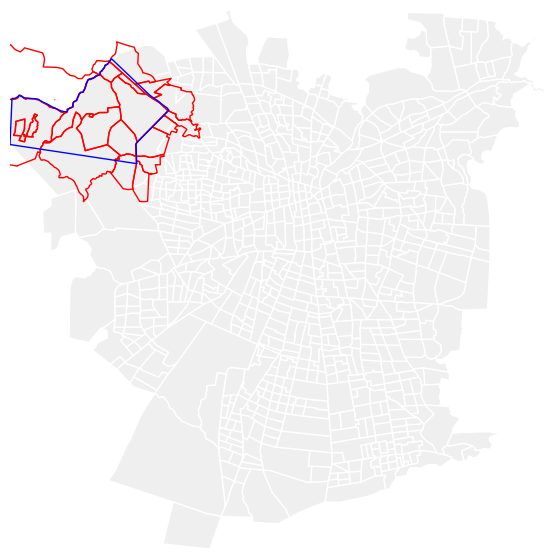

In [28]:
from aves.visualization.figures import figure_from_geodataframe

fig, ax = figure_from_geodataframe(zona777, height=7)

# contexto
zona777.plot(ax=ax, facecolor='#efefef', edgecolor='white', zorder=0)
#comunas_urbanas.plot(ax=ax, facecolor='none', edgecolor='#abacab', zorder=1)
zona777.loc[[562], "geometry"].plot(ax=ax, facecolor='none', edgecolor='blue', zorder=2)
merged_zoning[merged_zoning.index_right==562].plot(ax=ax, facecolor='none', edgecolor='red', zorder=1)

In [ ]:
viviendas = merged_zoning.groupby('id').agg({'NVIV': 'count'})

<Axes: >

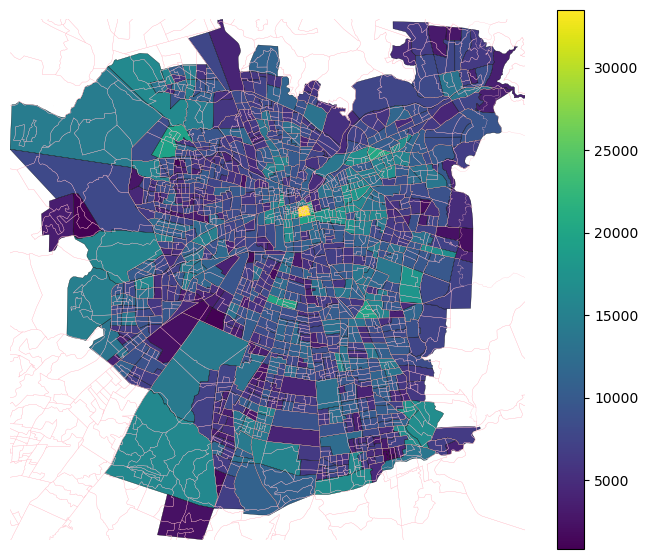

In [ ]:
grouped_data_geo = zona777.merge(viviendas, left_on='id', right_index=True)


fig, ax = figure_from_geodataframe(zona777, height=7)

# contexto
#comunas_urbanas.plot(ax=ax, facecolor='none', edgecolor='#abacab', zorder=1)
grouped_data_geo.plot(ax=ax,column='NVIV', cmap='viridis', legend=True)
censo_zoning_13.plot(ax=ax, facecolor='none', edgecolor='pink', zorder=2, linewidth=0.2)
zona777.plot(ax=ax, facecolor='none', edgecolor='black', zorder=1, linewidth=0.2)


In [ ]:
from aves.data.census import read_region

In [ ]:
zona777.set_crs(epsg=4674, inplace=True)

,geometry
0,"POLYGON ((-70.75950 -33.41237, -70.76014 -33.4..."
1,"POLYGON ((-70.73929 -33.38999, -70.73667 -33.3..."
2,"POLYGON ((-70.54357 -33.54802, -70.54293 -33.5..."
3,"POLYGON ((-70.54357 -33.54802, -70.54519 -33.5..."
4,"POLYGON ((-70.78731 -33.56483, -70.79797 -33.5..."
...,...
799,"POLYGON ((-70.75398 -33.36184, -70.74889 -33.3..."
800,"POLYGON ((-70.74889 -33.36107, -70.74621 -33.3..."
801,"POLYGON ((-70.74621 -33.36028, -70.74965 -33.3..."
802,"POLYGON ((-70.73742 -33.35790, -70.73619 -33.3..."


In [ ]:
for i in range(1, 17):
    df_region = read_region(i)
    spatial_index2 = df_region.sindex
# Check for overlapping geometries using the spatial index
    overlap = zona777.geometry.apply(lambda x: any(spatial_index2.intersection(x.bounds)))

    #overlap = zona777.geometry.intersects(df_region.geometry)
    if overlap.any():
        print(i)
#37.2